In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df = pd.read_csv('housing.csv', sep=r'\s+',header=None)
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [27]:
# defining feature selection and target variable 

X = df.drop('MEDV', axis=1)
y = df['MEDV']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [28]:
# splitting the datasets into testing and training sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [29]:
# model training 
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_


np.float64(30.24675099392349)

In [30]:
# prediction 
y_pred = model.predict(X_test)
y_pred[:5]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992])

In [31]:
# mse, rmse, r2 score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse).round(2)
r2 = r2_score(y_test, y_pred)

print("MSE:",round(mse, 2))
print("RMSE:", rmse)
print("R2 Score:",round(r2, 2))


MSE: 24.29
RMSE: 4.93
R2 Score: 0.67


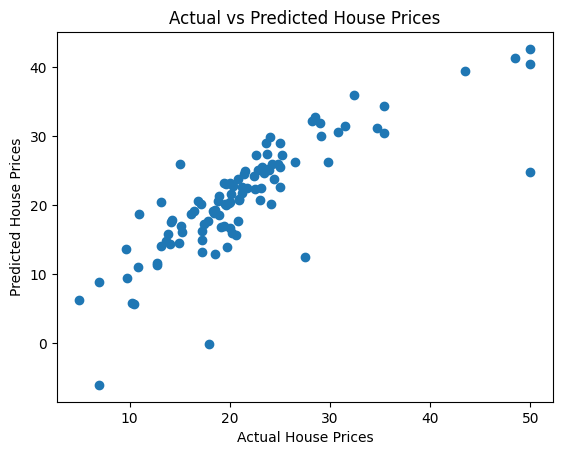

In [32]:
# plotting actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()